# Portafoglio efficiente

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


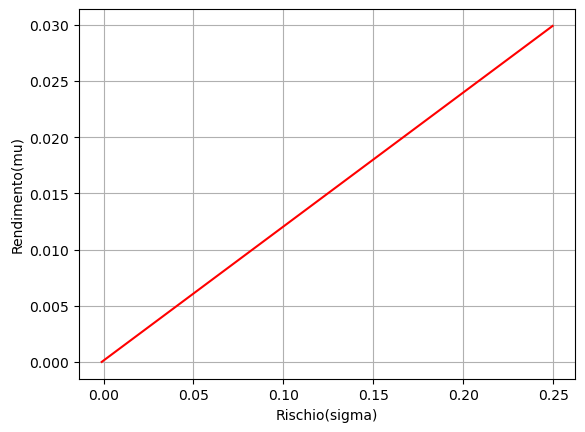

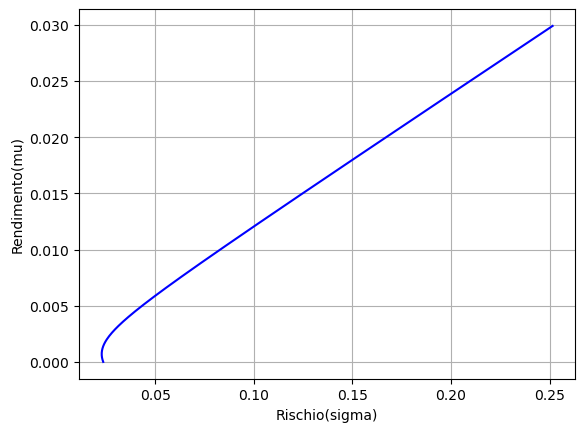

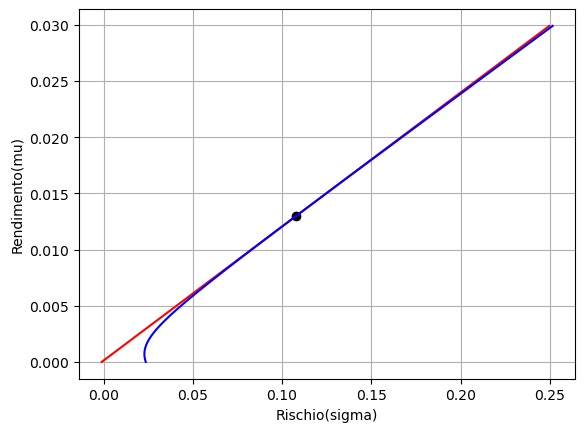

Il portafoglio ottimo secondo il modello di Markowitz ha la seguente composizione: [ 4.66874205  0.17670492  0.95125571 -2.02067427 -2.77602841]


In [2]:
!pip install yfinance
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


start = '2020-01-01' # Consideriamo i prezzi osservati compresi nel periodo 1 gennaio 2020 - 15 novembre 2022
end = '2021-01-01'
aapl = yf.download('AAPL', start, end) # apple
goog = yf.download('GOOG', start, end) # google
gm = yf.download('GM', start, end) # general motors
bac = yf.download('BAC', start, end) # bank of america
csco = yf.download('CSCO', start, end) # cisco

df = pd.concat([aapl['Adj Close'],
                goog['Adj Close'],
                gm['Adj Close'],
                bac['Adj Close'],
                csco['Adj Close']], axis=1)
df.columns = ['AAPL','GOOG','GM','BAC','CSCO']
df.head()


ret = np.log(df).diff().dropna() # Calcolo dei ritorni omettendo i missing values
ret.head()

VettoreRendimentiAttesi = ret.mean().values # Calcolo dei rendimenti medi dei 5 titoli
ret.mean()
VettoreRendimentiAttesiTrasposto = np.transpose(VettoreRendimentiAttesi)

MatriceVarianzeCovarianze = ret.cov().values # Calcolo della matrice di varianze-covarianze
ret.cov()
MatriceVarianzeCovarianzeInversa = np.linalg.inv(MatriceVarianzeCovarianze)


NumeroTitoli = 5
RendimentoTitoloRiskFree = 0.000123 # Rendimento del titolo risk free

VettoreUnitario = np.ones(NumeroTitoli)
VettoreUnitarioTrasposto = np.transpose(VettoreUnitario)

A = np.dot(np.dot(VettoreUnitarioTrasposto,MatriceVarianzeCovarianzeInversa),VettoreUnitario)
B = np.dot(np.dot(VettoreUnitarioTrasposto,MatriceVarianzeCovarianzeInversa),VettoreRendimentiAttesi)
C = np.dot(np.dot(VettoreRendimentiAttesiTrasposto,MatriceVarianzeCovarianzeInversa),VettoreRendimentiAttesi)


mu = np.arange(0,3,0.01)/100
sigma = (mu-RendimentoTitoloRiskFree) / (np.sqrt(C-2*B*RendimentoTitoloRiskFree+A*RendimentoTitoloRiskFree*RendimentoTitoloRiskFree))

# Costruzione della linea di mercato
plt.figure(1)
plt.grid()
plt.xlabel("Rischio(sigma)")
plt.ylabel("Rendimento(mu)")
plt.plot(sigma,mu,"red")
plt.show()


mu1 = np.arange(0,3,0.01)/100
sigma1 = np.sqrt((A*mu1*mu1-2*B*mu1+C)/(A*C-B*B))

# Costruzione della frontiera dei portafogli efficienti
plt.figure(2)
plt.grid()
plt.xlabel("Rischio(sigma)")
plt.ylabel("Rendimento(mu)")
plt.plot(sigma1,mu1,"blue")
plt.show()



muPortafoglioOttimo = (C-B*RendimentoTitoloRiskFree) / (B - A*RendimentoTitoloRiskFree)
ComposizionePortafoglioOttimo = (C-B*muPortafoglioOttimo)/(A*C-B*B)*np.dot(MatriceVarianzeCovarianzeInversa,VettoreUnitario) +(A*muPortafoglioOttimo-B)/(A*C-B*B)*np.dot(MatriceVarianzeCovarianzeInversa,VettoreRendimentiAttesi)
ComposizionePortafoglioOttimoInversa = np.transpose(ComposizionePortafoglioOttimo)
RendimentoAtteso = np.dot(ComposizionePortafoglioOttimoInversa,VettoreRendimentiAttesi)
VarianzaAttesa = np.dot(np.dot(ComposizionePortafoglioOttimoInversa,MatriceVarianzeCovarianze),ComposizionePortafoglioOttimo)
DeviazioneStandardAttesa = np.sqrt(VarianzaAttesa)

x = DeviazioneStandardAttesa
y = RendimentoAtteso

# Rappresentazione del portafoglio ottimo
plt.figure(3)
plt.grid()
plt.xlabel("Rischio(sigma)")
plt.ylabel("Rendimento(mu)")
plt.plot(x,y,color="black",marker="o")
plt.plot(sigma,mu,"red")
plt.plot(sigma1,mu1,"blue")
plt.show()

print(f"Il portafoglio ottimo secondo il modello di Markowitz ha la seguente composizione: {ComposizionePortafoglioOttimo}")